In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import skew, kurtosis

In [15]:
# Load the CSV file into a DataFrame
# file_path = 'bertopic_final_renamed.csv'
file_path = 'GenAI/genai_bertopic_HDBSCAN.csv'
df = pd.read_csv(file_path)

# Extract the 'Count' column
count_column = df['Count']

# Calculate the entropy of the distribution of the 'Count' column
count_entropy = entropy(count_column, base=2)

print("Entropy of the 'Count' column distribution:", count_entropy)
print('Variance', np.var(count_column))

# Compute skewness
vector_skewness = skew(count_column)
print(f"Skewness: {vector_skewness}")

# Compute kurtosis
vector_kurtosis = kurtosis(count_column)
print(f"Kurtosis: {vector_kurtosis}")

Entropy of the 'Count' column distribution: 4.363822349822628
Variance 39630425.8877551
Skewness: 3.2185795618160338
Kurtosis: 11.595557940152684


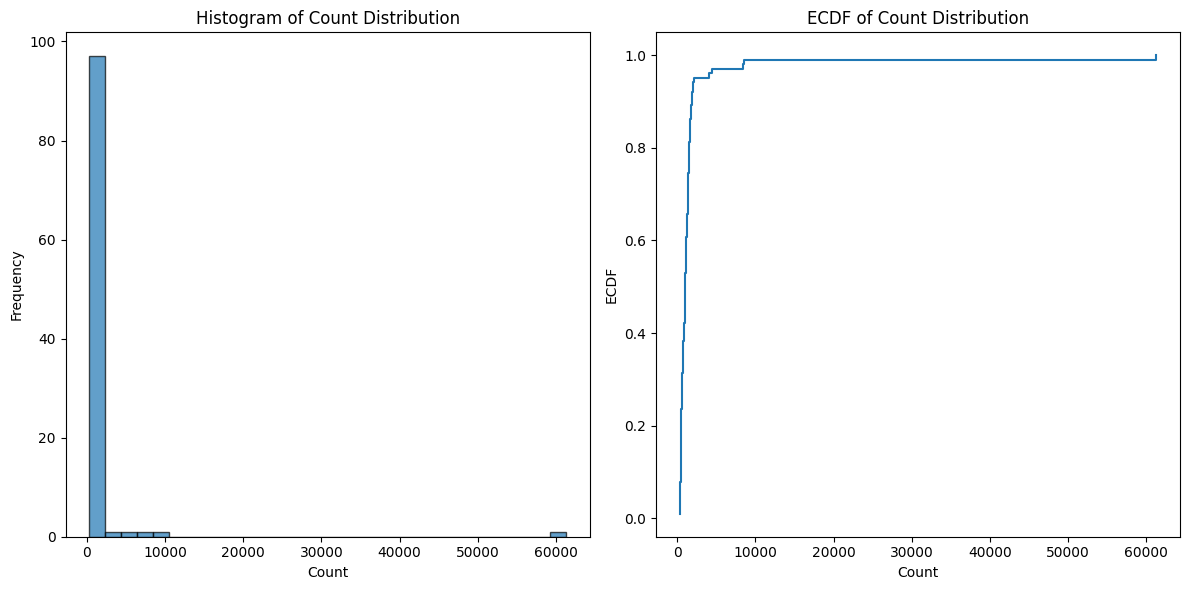

In [3]:
# Plot the histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(count_column, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Count Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Plot the ECDF
plt.subplot(1, 2, 2)
x = np.sort(count_column)
y = np.arange(1, len(x) + 1) / len(x)
plt.step(x, y, where='post')
plt.title('ECDF of Count Distribution')
plt.xlabel('Count')
plt.ylabel('ECDF')

plt.tight_layout()
plt.show()

In [4]:
def first_five_words(text):
    words = text.strip("[]").replace("'", "").split(",")[:5]
    return words
representation_column= df['Representation']
# Apply the function to the 'Representation' column
df['First_Five_Words'] = representation_column.apply(first_five_words)

# Display the DataFrame with the new column
print(df[['Representation', 'First_Five_Words']].head())



                                      Representation  \
0  ['market', 'growth', 'global', 'industry', 'mo...   
1  ['technology', 'manufacturing', 'company', 'co...   
2  ['fight', 'president', 'war', 'government', 'l...   
3  ['safety', 'customers', 'business', 'innovatio...   
4  ['shares', 'share', 'market', 'investment', 's...   

                                    First_Five_Words  
0       [market,  growth,  global,  industry,  more]  
1  [technology,  manufacturing,  company,  compan...  
2      [fight,  president,  war,  government,  last]  
3  [safety,  customers,  business,  innovation,  ...  
4  [shares,  share,  market,  investment,  sancti...  


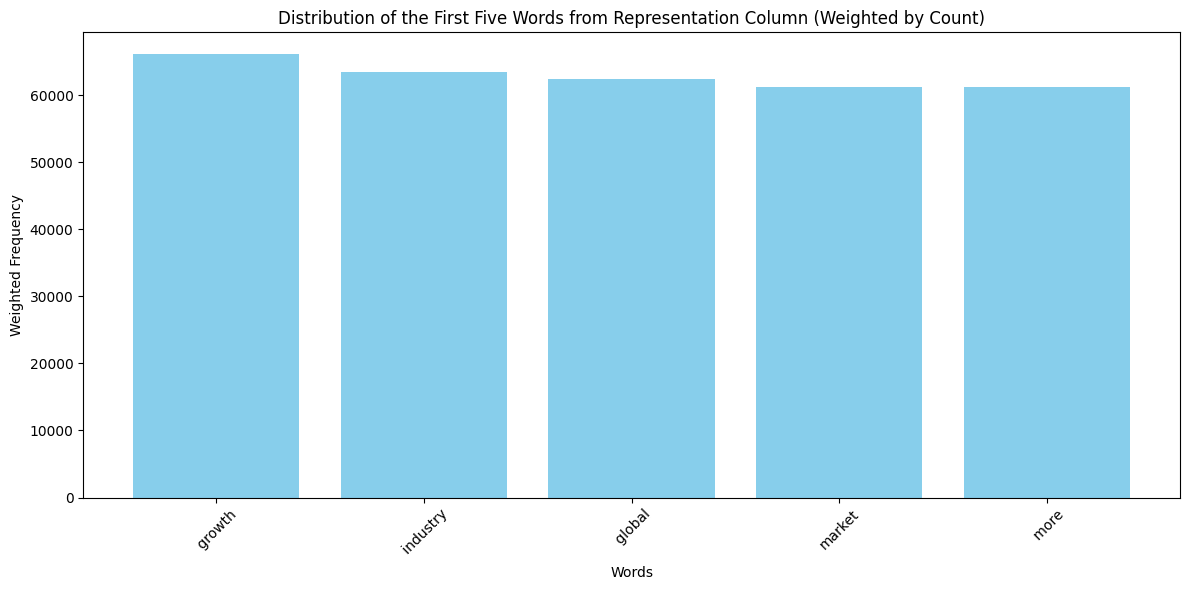

In [5]:
# Initialize a dictionary to hold the weighted word counts
word_counts = defaultdict(int)

# Compute the weighted counts
for words, count in zip(representation_column, count_column):
    for word in first_five_words(words):
        word_counts[word] += count

# Create a DataFrame for the word counts
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Weighted_Count'])

# Sort the DataFrame by weighted count in descending order
word_counts_df = word_counts_df.sort_values(by='Weighted_Count', ascending=False)

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['Word'][:5], word_counts_df['Weighted_Count'][:5], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of the First Five Words from Representation Column (Weighted by Count)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

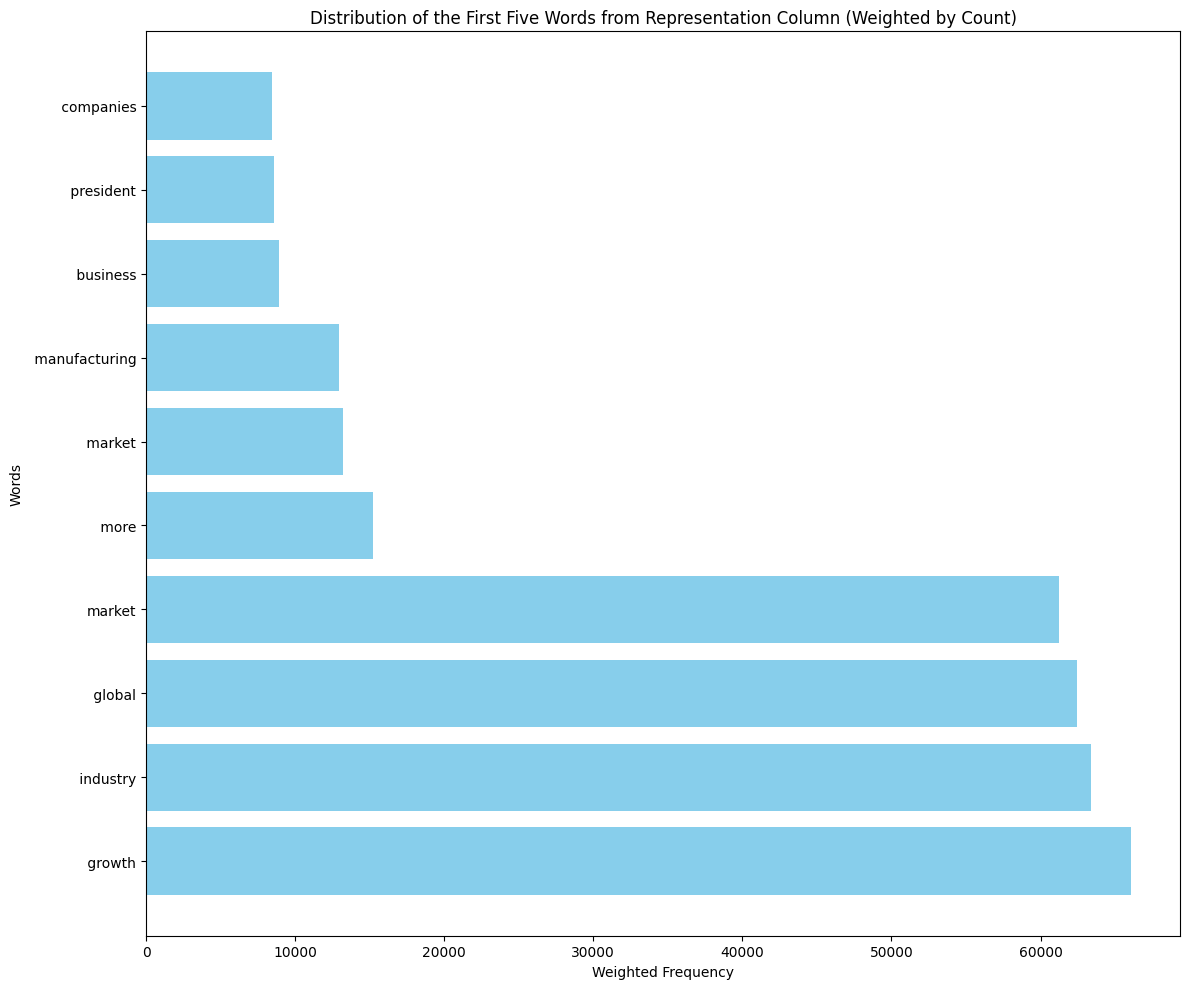

In [6]:
# Plot the distribution
plt.figure(figsize=(12, 10))
plt.barh(word_counts_df['Word'].unique()[:10], word_counts_df['Weighted_Count'].unique()[:10], color='skyblue')
plt.xlabel('Weighted Frequency')
plt.ylabel('Words')
plt.title('Distribution of the First Five Words from Representation Column (Weighted by Count)')
plt.tight_layout()
plt.show()

In [7]:
def concatenate_first_five_words(text):
    words = text.strip("[]").replace("'", "").split(",")[:5]
    return " ".join([word.strip() for word in words])

# Initialize a dictionary to hold the weighted word counts
topic_counts = defaultdict(int)

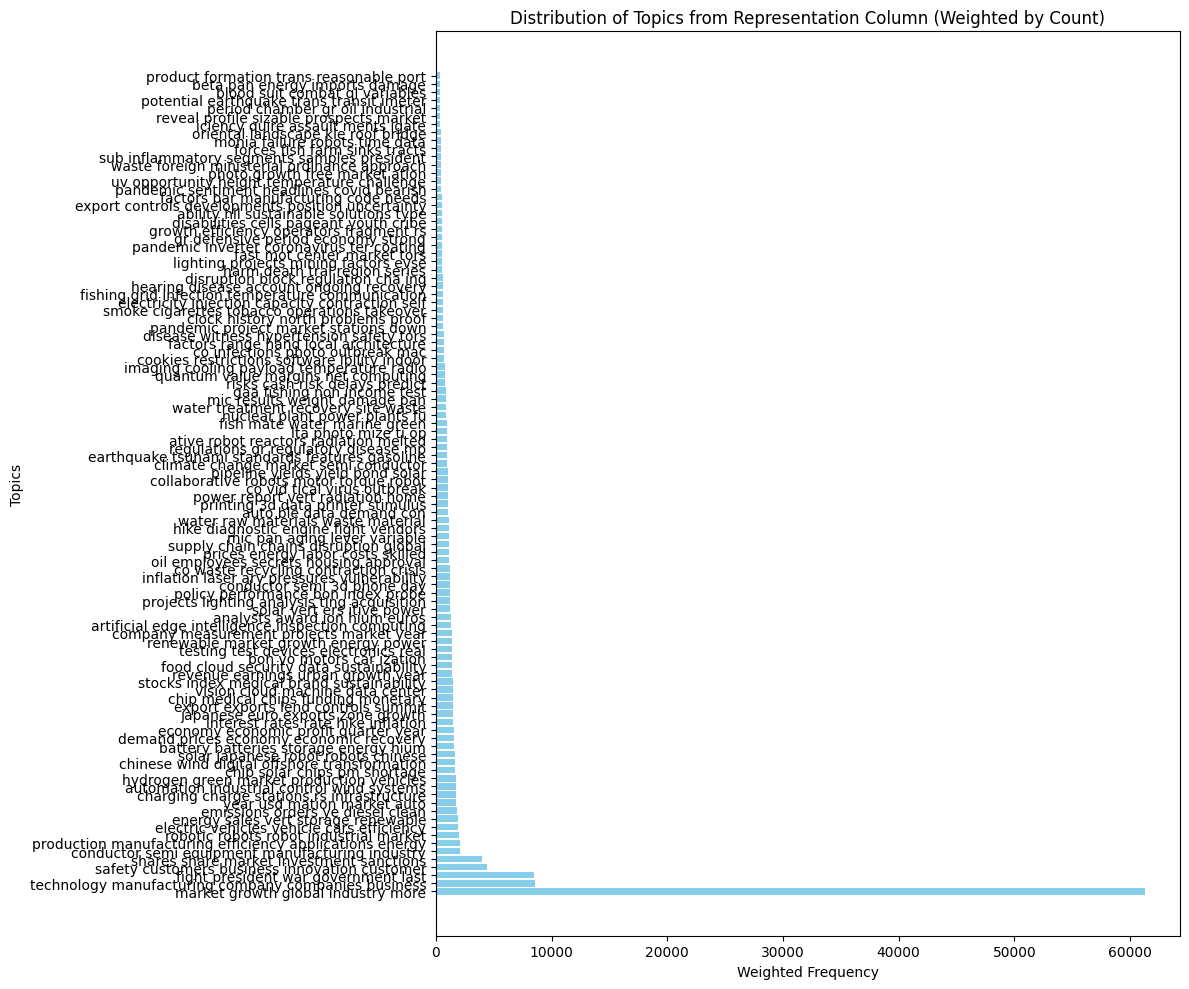

In [8]:
# Compute the weighted counts
for words, count in zip(representation_column, count_column):
    topic = concatenate_first_five_words(words)
    topic_counts[topic] += count

# Create a DataFrame for the topic counts
topic_counts_df = pd.DataFrame(topic_counts.items(), columns=['Topic', 'Weighted_Count'])

# Sort the DataFrame by weighted count in descending order
topic_counts_df = topic_counts_df.sort_values(by='Weighted_Count', ascending=False)

# Plot the distribution
plt.figure(figsize=(12, 10))
plt.barh(topic_counts_df['Topic'], topic_counts_df['Weighted_Count'], color='skyblue')
plt.xlabel('Weighted Frequency')
plt.ylabel('Topics')
plt.title('Distribution of Topics from Representation Column (Weighted by Count)')
plt.tight_layout()
plt.show()

In [9]:
word_counts_df['Word'][:10]

1             growth
3           industry
2             global
0             market
4               more
21            market
6      manufacturing
9           business
11         president
8          companies
Name: Word, dtype: object

In [12]:
word_counts_df['Word'].unique()[:10]

array([' growth', ' industry', ' global', 'market', ' more', ' market',
       ' manufacturing', ' business', ' president', ' companies'],
      dtype=object)

In [13]:
# Compute skewness
vector_skewness = skew(count_column)
print(f"Skewness: {vector_skewness}")

# Compute kurtosis
vector_kurtosis = kurtosis(count_column)
print(f"Kurtosis: {vector_kurtosis}")

AttributeError: 'Series' object has no attribute 'uniques'